# 1. Edge Decection

In [ ]:
from google.colab import files
files.upload()

In [ ]:
!ls -al

total 80
drwxr-xr-x 1 root root  4096 Oct 14 12:52 .
drwxr-xr-x 1 root root  4096 Oct 14 12:51 ..
-rw-r--r-- 1 root root 63506 Oct 14 12:52 car3.jpeg
drwxr-xr-x 4 root root  4096 Oct 12 13:25 .config
drwxr-xr-x 1 root root  4096 Oct 12 13:25 sample_data


In [ ]:
import cv2
import numpy as np
import math
from google.colab.patches import cv2_imshow

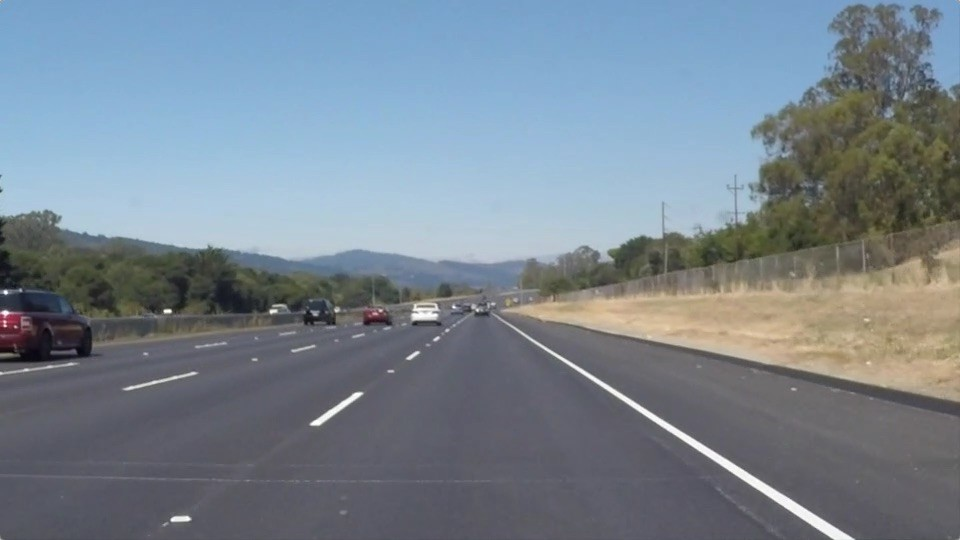

540 960 3


In [ ]:
file_name = 'car3.jpeg'
frame = cv2.imread(file_name)
cv2_imshow(frame)
height, width, channels = frame.shape
print(height, width, channels)

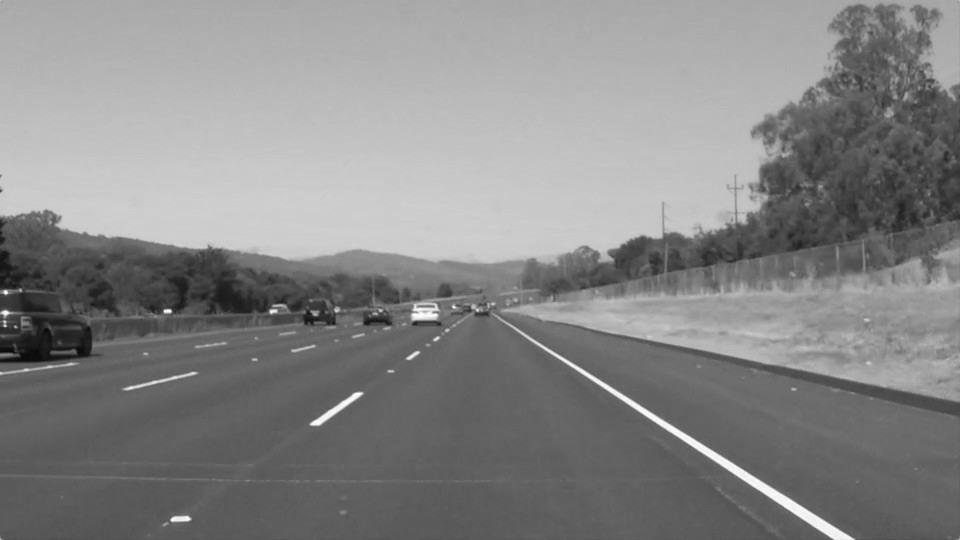

540 960


In [ ]:
# Conver the image to grayscale
gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
cv2_imshow(gray)
height, width = gray.shape
print(height, width)

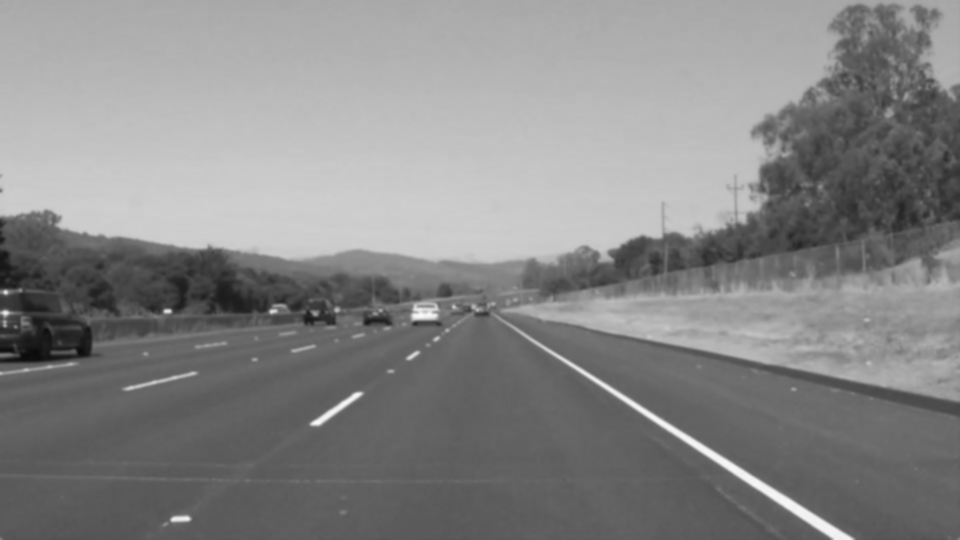

In [ ]:
# GussianBlur for refucing noise
blur = cv2.GaussianBlur(gray, (5, 5), 0)
cv2_imshow(blur)

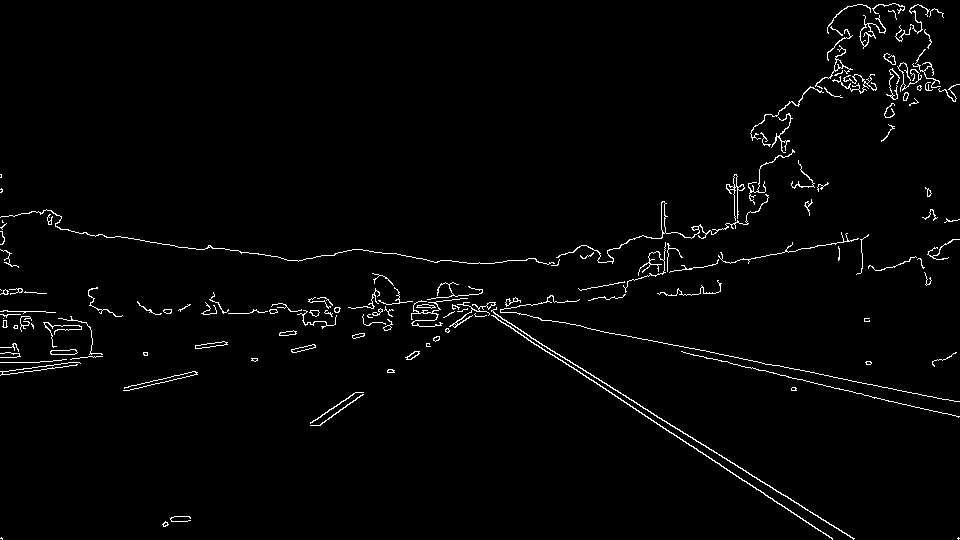

In [ ]:
canny = cv2.Canny(blur, 40, 130)
cv2_imshow(canny)

# 2.ROI

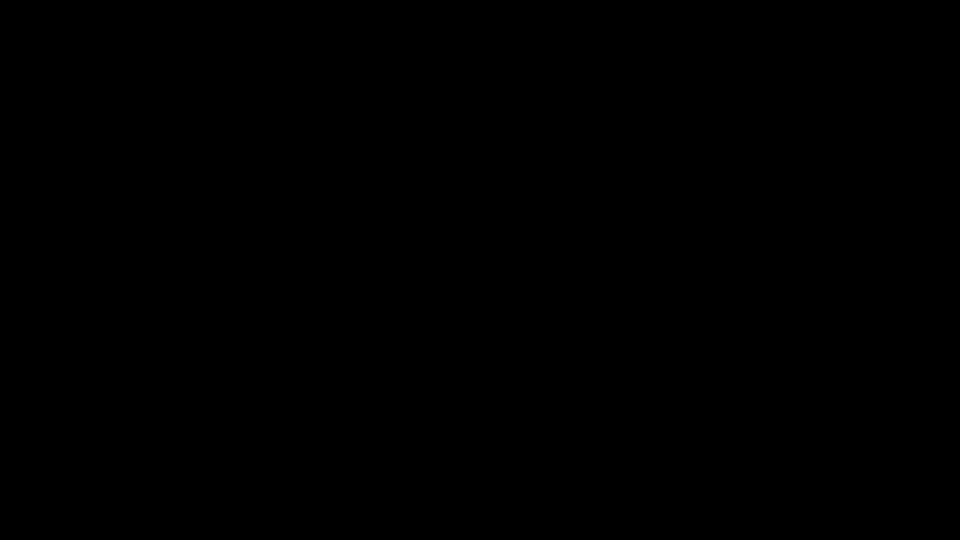

In [ ]:
mask = np.zeros((height, width), dtype = 'uint8')
cv2_imshow(mask)

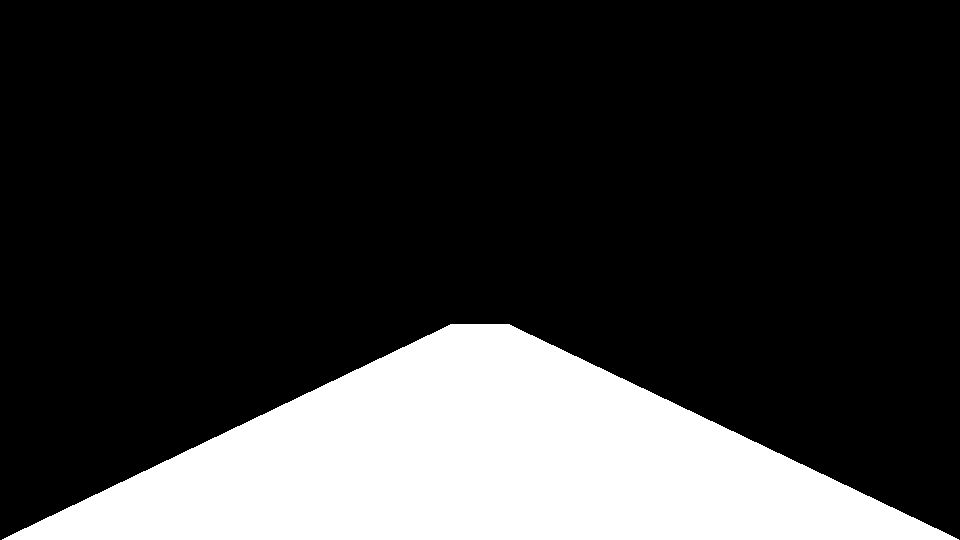

In [ ]:
poly_heigh = int(0.60 * height) # 길 높이 설정
poly_left = int(0.47 * width) # 왼쪽 도로 끝
poly_right = int(0.53 * width) # 오른쪽 도로 끝
polygons = np.array([[(0, height), (poly_left, poly_heigh), (poly_right, poly_heigh), (width, height)]])
cv2.fillPoly(mask, polygons, 255) # 흰색

cv2_imshow(mask)

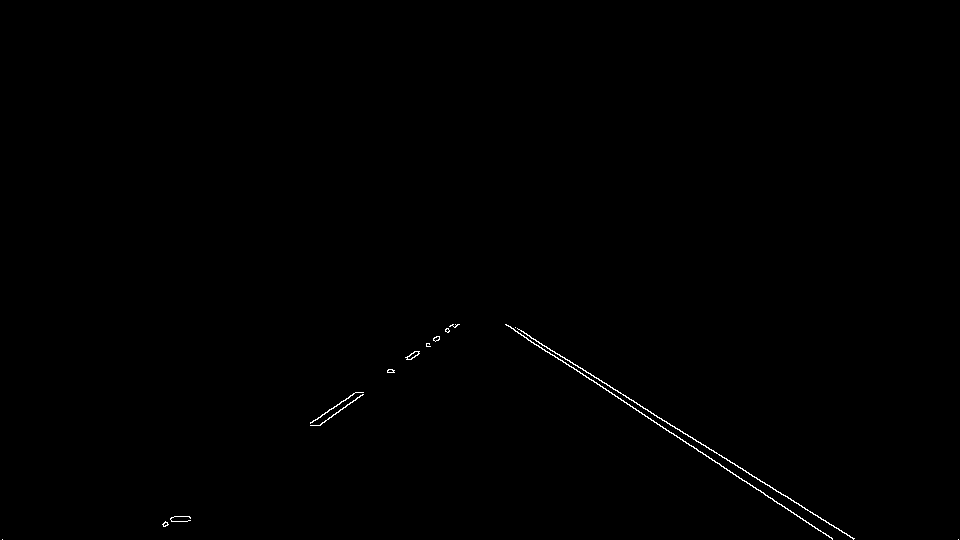

In [ ]:
# Bitwise operation between poly and mask
masked = cv2.bitwise_and(canny, mask) # 테두리 딴 거랑 사다리꼴 안에 있는 객체만 추출
cv2_imshow(masked)

# 3. Lane Detection

In [ ]:
lines = cv2.HoughLinesP(masked, 2, np.pi / 180, 20, np.array([]), 20, 10)
# 2 : 거리 해상도(픽셀) 2픽셀을 단위
# np.pi / 180 : 각도 해상도
# 20 : 얼마나 많은 점이 하나의 선이 되어야하는지 설정하는 임계값
# np.array([]) : 무시
# 20 : 최소 px 이상
# 10 : 선분간 허용되는 최대 px 거리 -> 크기가 작을수록 일직선, 클수록 다른 선으로

[[712 460 832 538]]
[[515 327 853 538]]
[[505 324 719 463]]
[[310 422 355 392]]
[[331 417 362 394]]
[[406 357 453 324]]
[[409 359 439 339]]
[[651 420 717 462]]
[[318 425 363 392]]
[[310 423 358 392]]
[[706 456 738 476]]
[[408 359 459 324]]
[[410 359 430 346]]
[[164 522 187 521]]
[[506 325 680 438]]
[[409 356 455 324]]
[[426 346 457 324]]


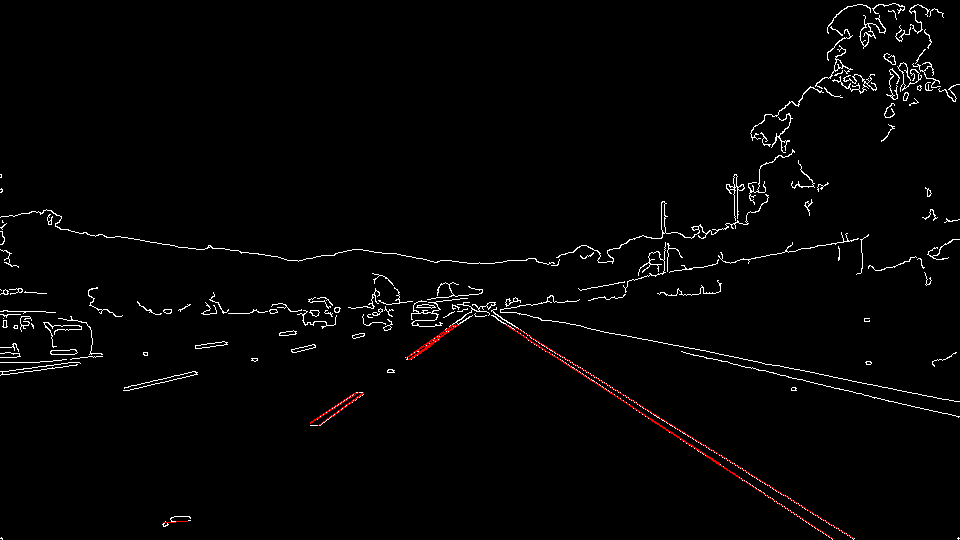

In [ ]:
image_rgb = cv2.cvtColor(canny, cv2.COLOR_GRAY2RGB)
if lines is not None: # line을 찾으면 실행
  for line in lines:
    print(line)
    x1, y1, x2, y2 = line.reshape(4)  # 시작 좌표 끝 좌표 할당
    cv2.line(image_rgb, (x1, y1), (x2, y2), (0, 0, 255), 1) # 빨간색 선 1 두께로 그리기
  cv2_imshow(image_rgb)
  cv2_imshow(image_rgb)

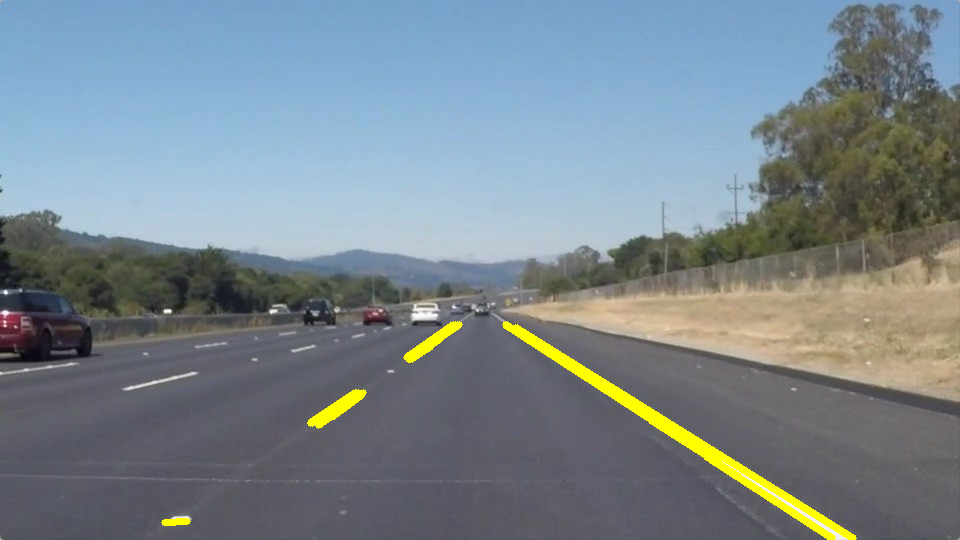

In [ ]:
for line in lines:
  for x1, y1, x2, y2 in line:
    cv2.line(frame, (x1, y1), (x2, y2), (0, 255, 255), 5)
cv2_imshow(frame)

# Video

In [ ]:
from google.colab import files
files.upload()

Saving test_video.mp4 to test_video.mp4


In [ ]:
!ls -al

In [ ]:
import cv2
import numpy as np
import IPython
from google.colab.patches import cv2_imshow

In [ ]:
file_name = 'test_video.mp4'

In [ ]:
def detectAndDisplay(frame):
  IPython.display.clear_output(wait = True)
  gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
  height, width = gray.shape
  blur = cv2.GaussianBlur(gray, (5, 5), 0)
  canny = cv2.Canny(blur, 40, 130)
  mask = np.zeros((height, width), dtype = 'uint8')
  poly_heigh = int(0.60 * height)
  poly_left = int(0.47 * width)
  poly_right = int(0.53 * width)
  polygons = np.array([[(0, height), (poly_left, poly_heigh), (poly_right, poly_heigh), (width, height)]])
  cv2.fillPoly(mask, polygons, 255)
  masked = cv2.bitwise_and(canny, mask)
  lines = cv2.HoughLinesP(masked, 2, np.pi / 180, 20, np.array([]), 20, 10)
  for line in lines:
    for x1, y1, x2, y2 in line:
      cv2.line(frame, (x1, y1), (x2, y2), (0, 255, 0), 5)
  cv2_imshow(frame)

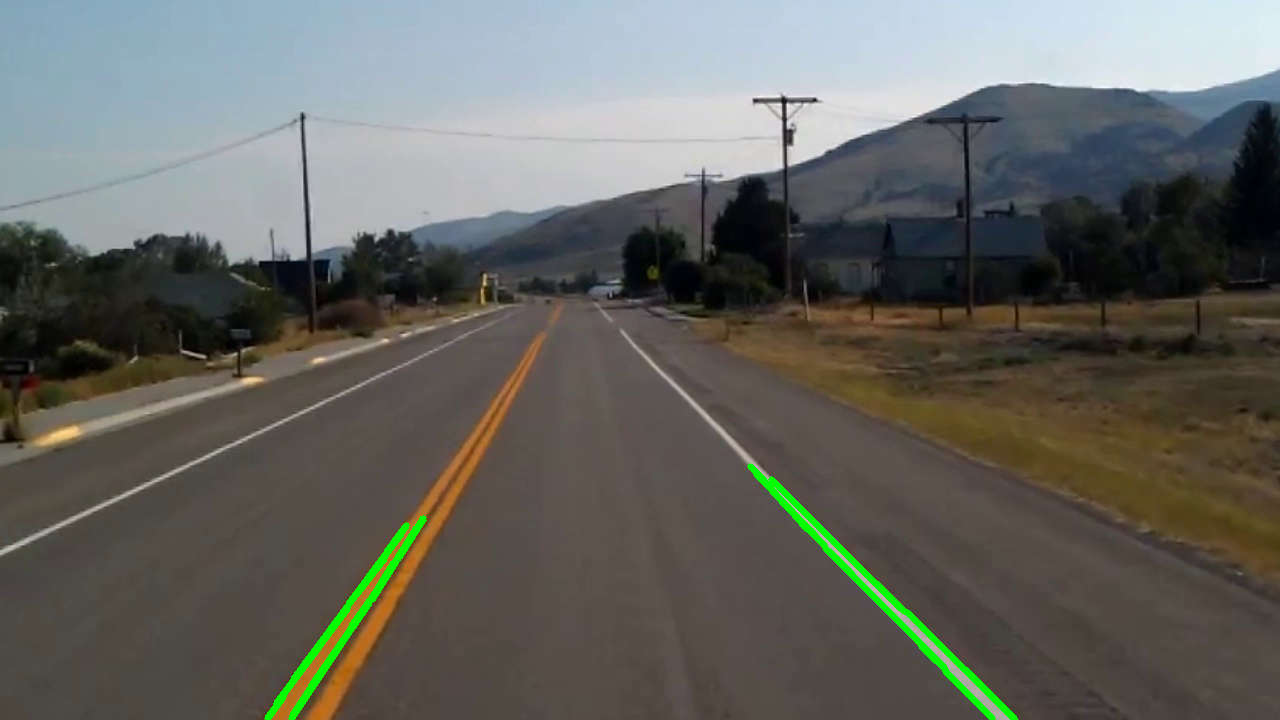

In [ ]:
cap = cv2.VideoCapture(file_name)

if not cap.isOpened:
  print('--(!)Error opening video capture')
  exit(0)

while True:
  ret, frame = cap.read()
  if frame is None:
    print('--(!) No capture frame -- Break')
    break
  detectAndDisplay(frame)

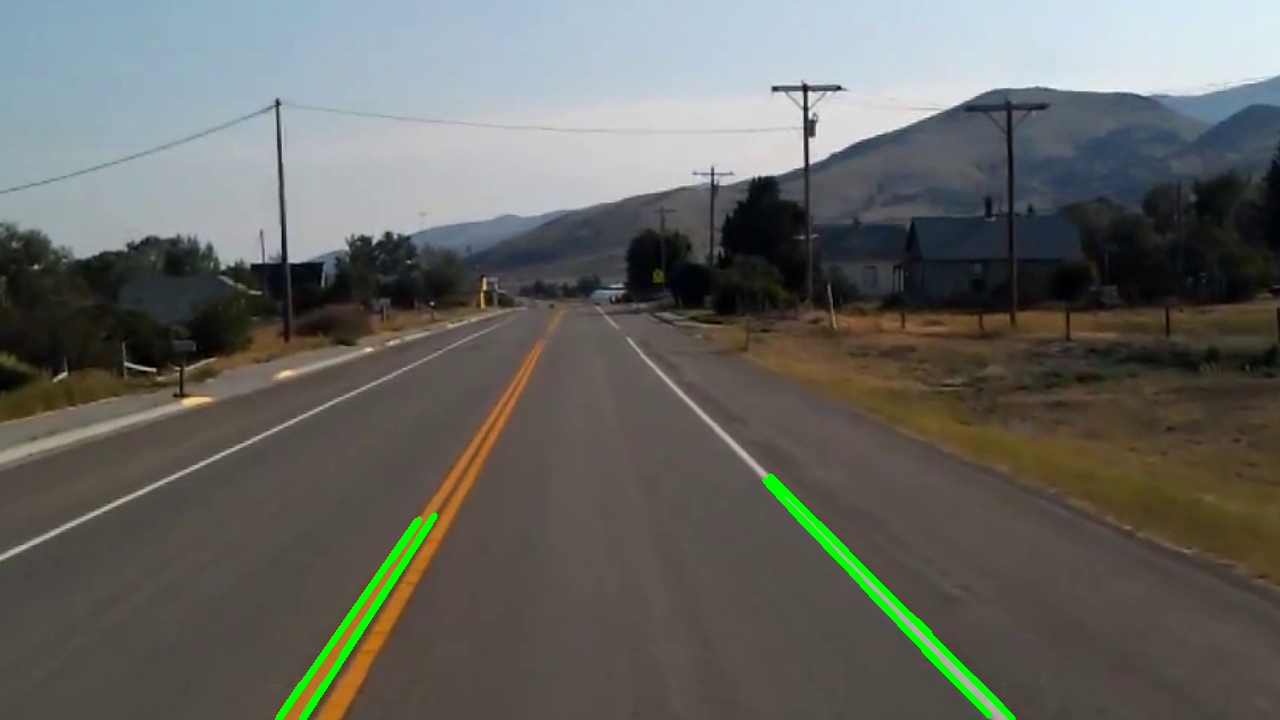

--(!) No capture frame -- Break


In [ ]:
# 동영상 출력 설정
output_file_name = "output_video.mp4"
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # 코덱 설정, 확장자에 따라 다를 수 있음
frame_rate = 30.0  # 프레임 속도
output_width = 640  # 출력 동영상 너비
output_height = 360  # 출력 동영상 높이
out = cv2.VideoWriter(output_file_name, fourcc, frame_rate, (output_width, output_height))

# 동영상을 캡처
cap = cv2.VideoCapture(file_name)

if not cap.isOpened():
    print('--(!)Error opening video capture')
    exit(0)

while True:
    ret, frame = cap.read()
    if frame is None:
        print('--(!) No capture frame -- Break')
        break
    detectAndDisplay(frame)  # 프레임에 선을 그리는 함수
    out.write(frame)  # 프레임을 동영상에 추가

out.release()  # 동영상 작성 종료
cap.release()  # 캡처 종료
cv2.destroyAllWindows()  # 창 닫기